In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the data
mr=pd.read_csv("Marketing_restaurant.csv")

In [3]:
mr.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [4]:
### data cleaning process

In [5]:
mr.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
print("Duplicates:")
duplicates = mr.duplicated()
print("Number of Duplicates:", duplicates.sum())

Duplicates:
Number of Duplicates: 0


In [7]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
# Cities with maximum/minimum number of restaurants
city_counts = mr['City'].value_counts()
city_counts

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Lincoln         1
Monroe          1
Potrero         1
Weirton         1
Miller          1
Name: City, Length: 141, dtype: int64

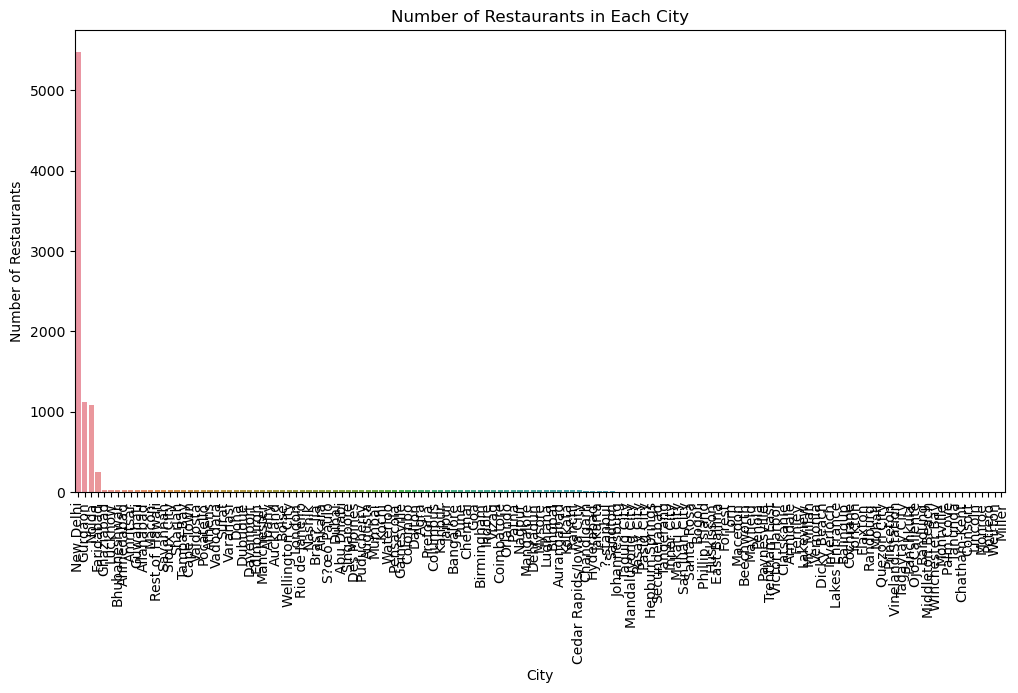

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Number of Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

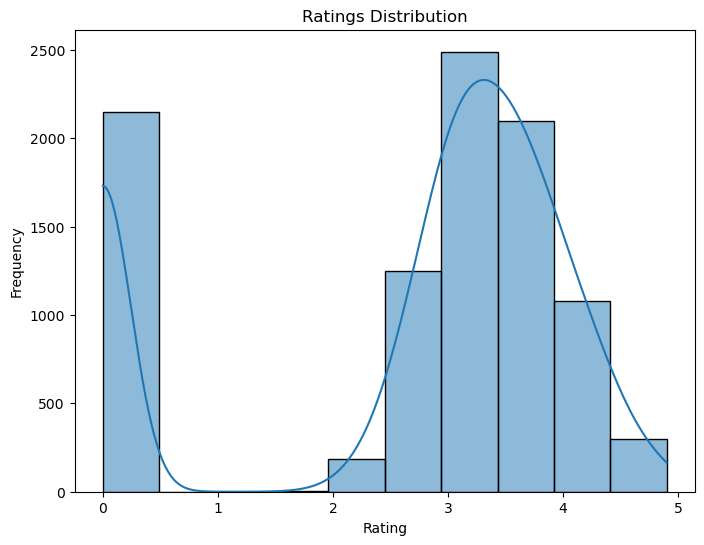

In [10]:
# Ratings distribution overall
plt.figure(figsize=(8, 6))
sns.histplot(mr['Aggregate rating'], bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
franchise_counts =mr['Restaurant Name'].value_counts()
top_franchise = franchise_counts.idxmax()
print(f"Franchise with Most National Presence: {top_franchise}")

Franchise with Most National Presence: Cafe Coffee Day


In [18]:
#Ratio of restaurants allowing table booking vs not
table_booking_ratio = mr['Has Table booking'].value_counts(normalize=True)
print("\nRatio of Restaurants Allowing Table Booking:")
print(table_booking_ratio)


Ratio of Restaurants Allowing Table Booking:
No     0.878756
Yes    0.121244
Name: Has Table booking, dtype: float64


In [19]:
# Percentage of restaurants providing online delivery
online_delivery_percentage =mr['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Providing Online Delivery: ")
print(online_delivery_percentage)

Percentage of Restaurants Providing Online Delivery: 
No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64


In [21]:
# Difference in number of votes for restaurants that deliver vs don't
delivery_votes = mr.groupby('Has Online delivery')['Votes'].mean()
print("Average Number of Votes for Restaurants:")
print(delivery_votes)

Average Number of Votes for Restaurants:
Has Online delivery
No     138.131127
Yes    211.307222
Name: Votes, dtype: float64


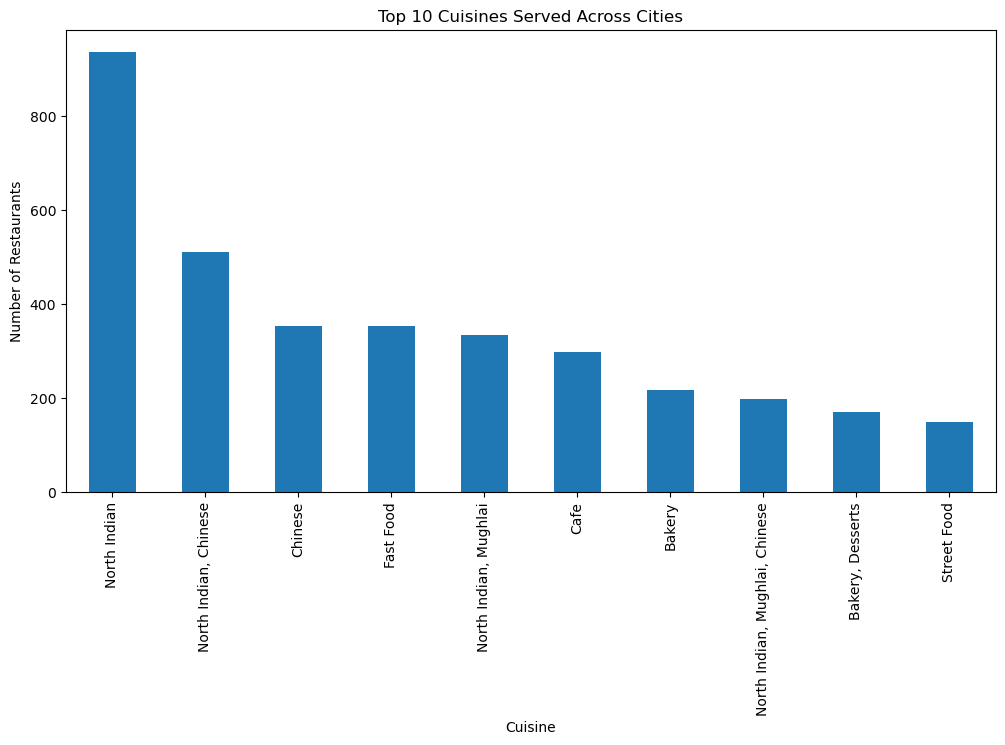

In [22]:
#Top 10 cuisines served across cities
top_cuisines =mr.groupby('Cuisines')['Restaurant ID'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar')
plt.title('Top 10 Cuisines Served Across Cities')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

In [23]:
# Max and Min number of cuisines served and relationship with Ratings
cuisines_stats =mr.groupby('Restaurant ID')['Cuisines'].nunique()
print("Max and Min Number of Cuisines Served:")
print("Maximum:", cuisines_stats.max())
print("Minimum:", cuisines_stats.min())

Max and Min Number of Cuisines Served:
Maximum: 1
Minimum: 0


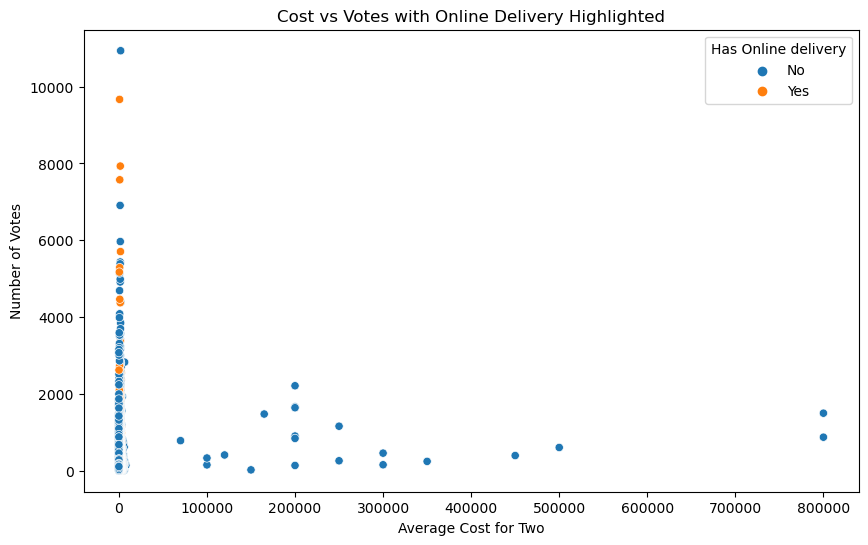

In [24]:
#Cost vs other variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Votes', hue='Has Online delivery', data=mr)
plt.title('Cost vs Votes with Online Delivery Highlighted')
plt.xlabel('Average Cost for Two')
plt.ylabel('Number of Votes')
plt.show()

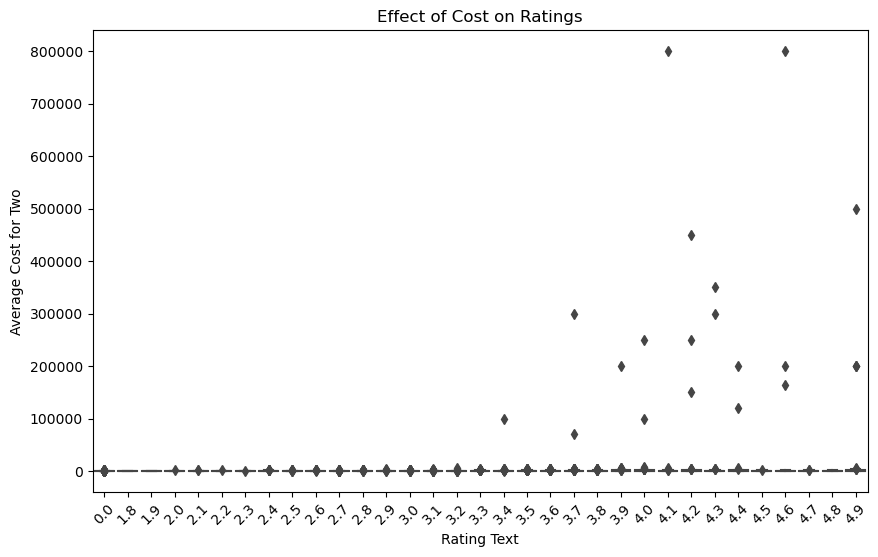

In [69]:
#Factors affecting ratings
plt.figure(figsize=(10,6))
sns.boxplot(x='Aggregate rating',y='Average Cost for two', data=mr)
plt.title('Effect of Cost on Ratings')
plt.xlabel('Rating Text')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45) 
plt.show()

In [47]:
maximum_cost = mr['Average Cost for two'].max()
minimum_cost = mr['Average Cost for two'].min()

print(f"Maximum Cost: {maximum_cost}")
print(f"Minimum Cost: {minimum_cost}")

Maximum Cost: 800000
Minimum Cost: 0


<Axes: xlabel='Aggregate rating', ylabel='Average Cost for two'>

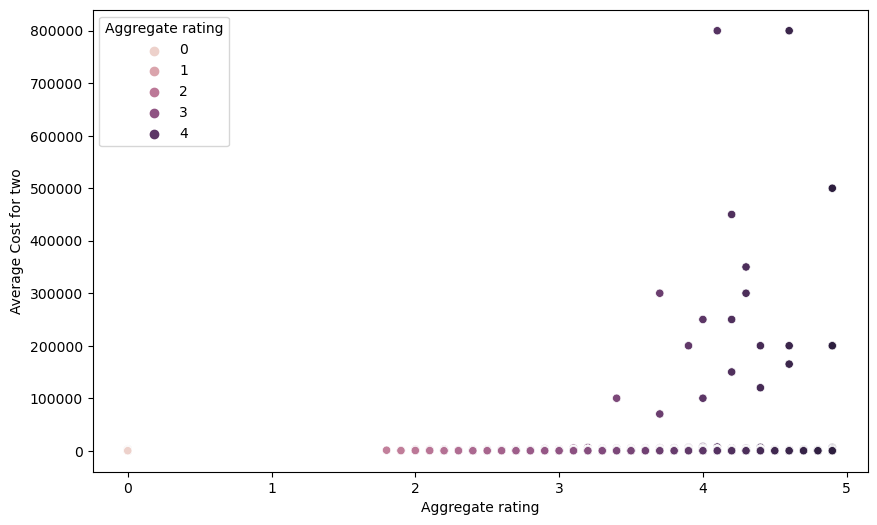

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=mr["Aggregate rating"],y=mr["Average Cost for two"],hue=mr["Aggregate rating"])

 # Conclusion :

- With the given data , maximum number of restaurants are in India, hence the data indicates trends and choices are influenced by Indian customers regarding restaurants. 
- the Franchise with Most National Presence is Cafe Coffee Day and in the list of Top 10 cuisines served across cities, fast food anf cafe are in 4th and 6th place respectively.
  It indicates that customers are prefering food that takes less time to be served and needs less utensils.
- From the Cost vs other variables chart, it is noticeble that online delivery helps tp get more votes.